In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#import dataset
salary=pd.read_csv('D:\\SalaryData_Train.csv')
salary

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
salary.shape

(30161, 14)

In [8]:
salary.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [9]:
salary.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [10]:
#no null values


In [11]:
salary.duplicated().value_counts()

False    26903
True      3258
dtype: int64

In [12]:
salary.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [17]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [18]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [19]:
le=LabelEncoder()

In [78]:
salary['Salary']=le.fit_transform(salary['Salary'])
salary
#less than 50k=0
#greater than 50k=1

,age,educationno,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,39,13,4,1,2174,0,40,0
1,50,13,4,1,0,0,13,0
2,38,9,4,1,0,0,40,0
3,53,7,2,1,0,0,40,0
4,28,13,2,0,0,0,40,0
...,...,...,...,...,...,...,...,...
30156,27,12,4,0,0,0,38,0
30157,40,9,4,1,0,0,40,1
30158,58,9,4,0,0,0,40,0
30159,22,9,4,1,0,0,20,0


### Data Visualization

<AxesSubplot:xlabel='workclass', ylabel='count'>

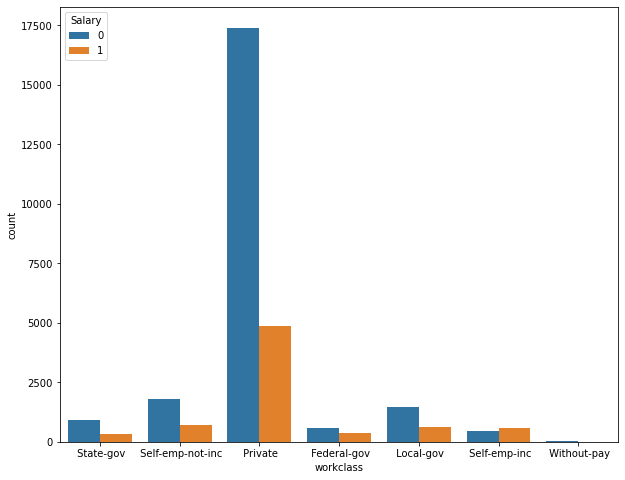

In [22]:
plt.figure(figsize = (10,8))
sns.countplot(x="workclass", hue="Salary", data=salary)

<AxesSubplot:xlabel='education', ylabel='count'>

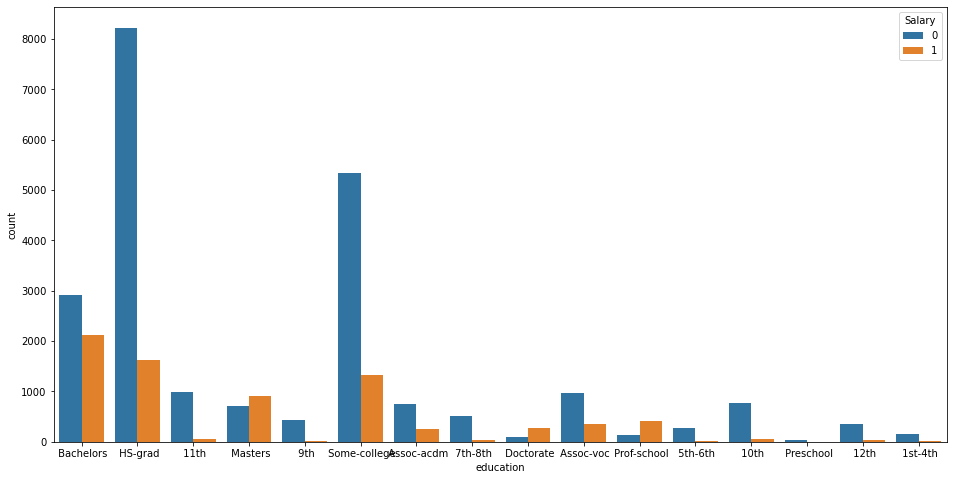

In [23]:
plt.figure(figsize = (16,8))
sns.countplot(x="education", hue="Salary", data=salary)

<AxesSubplot:xlabel='occupation', ylabel='count'>

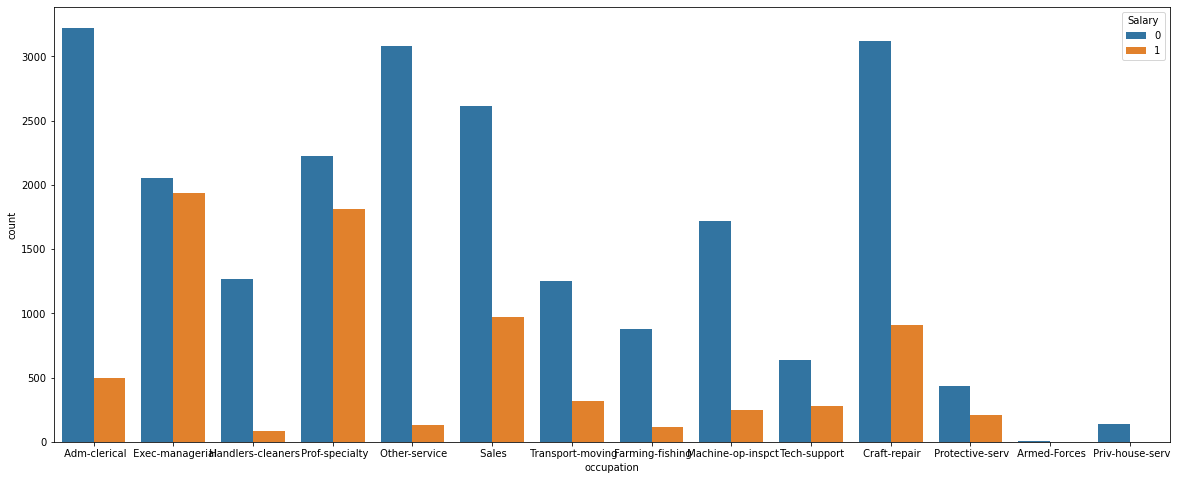

In [24]:
plt.figure(figsize = (20,8))
sns.countplot(x="occupation", hue="Salary", data=salary)

<AxesSubplot:xlabel='relationship', ylabel='count'>

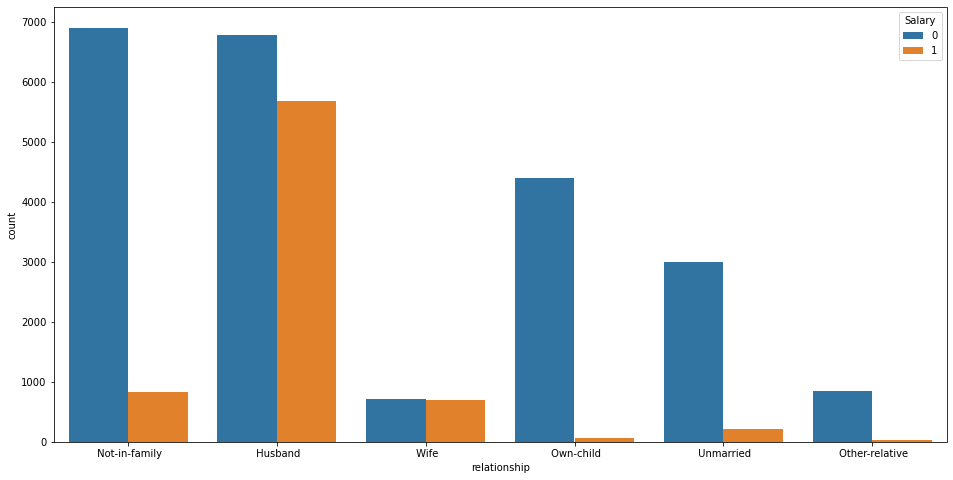

In [25]:
plt.figure(figsize = (16,8))
sns.countplot(x="relationship", hue="Salary", data=salary)

<AxesSubplot:xlabel='race', ylabel='count'>

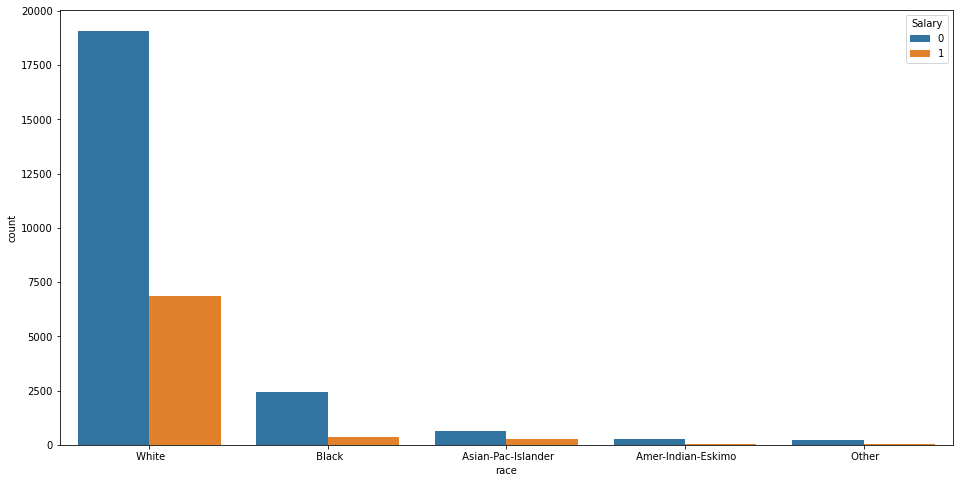

In [26]:
plt.figure(figsize = (16,8))
sns.countplot(x="race", hue="Salary", data=salary)

<AxesSubplot:xlabel='native', ylabel='count'>

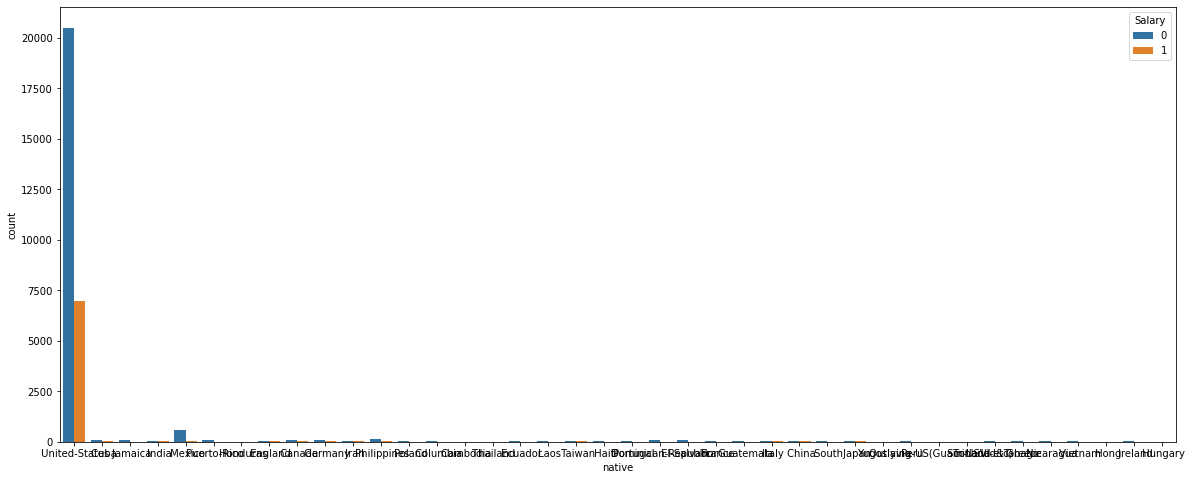

In [27]:
plt.figure(figsize = (20,8))
sns.countplot(x="native", hue="Salary", data=salary)

In [28]:
salary['Salary'].value_counts()

0    22653
1     7508
Name: Salary, dtype: int64

In [29]:
salary['sex'] = le.fit_transform(salary['sex'])
salary

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,0,0,0,38,United-States,0
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,1,0,0,40,United-States,1
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,0,0,0,40,United-States,0
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,1,0,0,20,United-States,0


In [30]:
salary['race'] = le.fit_transform(salary['race'])
salary

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,4,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,4,1,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,4,1,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,2,1,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,2,0,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,4,0,0,0,38,United-States,0
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,4,1,0,0,40,United-States,1
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,4,0,0,0,40,United-States,0
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,4,1,0,0,20,United-States,0


In [31]:
cat_cols = pd.DataFrame(salary[['workclass','education','maritalstatus','occupation','relationship','native']])
cat_cols

,workclass,education,maritalstatus,occupation,relationship,native
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Cuba
...,...,...,...,...,...,...
30156,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,United-States
30157,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,United-States
30158,Private,HS-grad,Widowed,Adm-clerical,Unmarried,United-States
30159,Private,HS-grad,Never-married,Adm-clerical,Own-child,United-States


In [32]:
salary = salary.drop(salary[['workclass','education','maritalstatus','occupation','relationship','native']],axis = 1)
salary

,age,educationno,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,39,13,4,1,2174,0,40,0
1,50,13,4,1,0,0,13,0
2,38,9,4,1,0,0,40,0
3,53,7,2,1,0,0,40,0
4,28,13,2,0,0,0,40,0
...,...,...,...,...,...,...,...,...
30156,27,12,4,0,0,0,38,0
30157,40,9,4,1,0,0,40,1
30158,58,9,4,0,0,0,40,0
30159,22,9,4,1,0,0,20,0


In [33]:
cat_cols = pd.get_dummies(cat_cols)
cat_cols

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
30157,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
30158,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
30159,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [34]:
salary

,age,educationno,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,39,13,4,1,2174,0,40,0
1,50,13,4,1,0,0,13,0
2,38,9,4,1,0,0,40,0
3,53,7,2,1,0,0,40,0
4,28,13,2,0,0,0,40,0
...,...,...,...,...,...,...,...,...
30156,27,12,4,0,0,0,38,0
30157,40,9,4,1,0,0,40,1
30158,58,9,4,0,0,0,40,0
30159,22,9,4,1,0,0,20,0


In [35]:
x = salary.iloc[:,:-1]
x

,age,educationno,race,sex,capitalgain,capitalloss,hoursperweek
0,39,13,4,1,2174,0,40
1,50,13,4,1,0,0,13
2,38,9,4,1,0,0,40
3,53,7,2,1,0,0,40
4,28,13,2,0,0,0,40
...,...,...,...,...,...,...,...
30156,27,12,4,0,0,0,38
30157,40,9,4,1,0,0,40
30158,58,9,4,0,0,0,40
30159,22,9,4,1,0,0,20


In [36]:
y_train = salary.iloc[:,-1]
y_train

0        0
1        0
2        0
3        0
4        0
        ..
30156    0
30157    1
30158    0
30159    0
30160    1
Name: Salary, Length: 30161, dtype: int32

In [37]:
cat_cols.columns

Index(['workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th',
       'education_ 11th', 'education_ 12th', 'education_ 1st-4th',
       'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th',
       'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors',
       'education_ Doctorate', 'education_ HS-grad', 'education_ Masters',
       'education_ Preschool', 'education_ Prof-school',
       'education_ Some-college', 'maritalstatus_ Divorced',
       'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse',
       'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married',
       'maritalstatus_ Separated', 'maritalstatus_ Widowed',
       'occupation_ Adm-clerical', 'occupation_ Armed-Forces',
       'occupation_ Craft-repair', 'occupation_ Exec-managerial',
       'occupation_ Fa

In [38]:
data = pd.concat([x,cat_cols] , axis = 1)

In [39]:
data

,age,educationno,race,sex,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,4,1,2174,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,4,1,0,0,13,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,4,1,0,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,7,2,1,0,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,13,2,0,0,0,40,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,12,4,0,0,0,38,0,0,1,...,0,0,0,0,0,0,0,1,0,0
30157,40,9,4,1,0,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
30158,58,9,4,0,0,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
30159,22,9,4,1,0,0,20,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
SC = StandardScaler()
data = SC.fit_transform(data)
data

array([[ 0.04277892,  1.12889813,  0.38505523, ...,  0.31081205,
        -0.04611353, -0.0230384 ],
       [ 0.88026081,  1.12889813,  0.38505523, ...,  0.31081205,
        -0.04611353, -0.0230384 ],
       [-0.0333558 , -0.4397325 ,  0.38505523, ...,  0.31081205,
        -0.04611353, -0.0230384 ],
       ...,
       [ 1.48933854, -0.4397325 ,  0.38505523, ...,  0.31081205,
        -0.04611353, -0.0230384 ],
       [-1.25151126, -0.4397325 ,  0.38505523, ...,  0.31081205,
        -0.04611353, -0.0230384 ],
       [ 1.03253024, -0.4397325 ,  0.38505523, ...,  0.31081205,
        -0.04611353, -0.0230384 ]])

In [42]:
from sklearn.decomposition import PCA

In [43]:
pca = PCA(n_components = 7)

In [44]:
PCs = pca.fit_transform(data)
PCs

array([[-0.70805145, -2.95447792, -0.14247038, ...,  1.493657  ,
        -0.41373644,  0.33863446],
       [ 2.86226729, -0.97793075, -0.14633332, ...,  0.98265267,
         0.06132967, -1.08508429],
       [-1.35538684,  0.45559506, -0.2317003 , ..., -0.60233897,
        -1.99183779,  1.40787392],
       ...,
       [-1.65666049, -0.26126096,  2.29272826, ..., -0.99478487,
         1.10795187, -0.35241448],
       [-2.70241439,  0.37808038, -2.0529823 , ...,  0.48373042,
         1.13297263,  0.37246942],
       [ 1.78172009, -0.68750929,  0.98786745, ..., -0.18143501,
         1.97953986, -2.49967126]])

In [45]:
pc = pca.n_components
pc

7

In [46]:
pca.explained_variance_ratio_

array([0.04237509, 0.03056485, 0.0236471 , 0.022208  , 0.01788771,
       0.01704247, 0.01504581])

In [47]:
pca.explained_variance_

array([4.11052041, 2.9648891 , 2.29384487, 2.15424717, 1.73516578,
       1.65317401, 1.45949148])

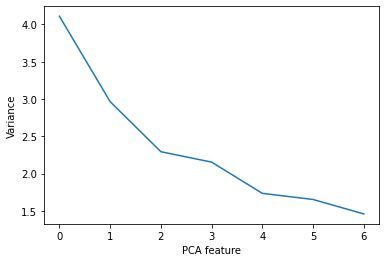

In [48]:
plt.plot(range(pc), pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.show()

In [49]:
#3 principal components seem to contain atleast 80% of data 

In [52]:
pca = PCA(n_components = 3)

In [53]:
newdata = pca.fit_transform(data)
newdata

array([[-0.70815209, -2.95093263, -0.14308534],
       [ 2.86203596, -0.9797319 , -0.13388069],
       [-1.3553287 ,  0.4587976 , -0.21833488],
       ...,
       [-1.65661455, -0.26412107,  2.2853445 ],
       [-2.70250204,  0.37775906, -2.04791618],
       [ 1.78075419, -0.68724556,  0.99193444]])

In [54]:
X_train = pd.DataFrame(newdata , columns = ['PC1','PC2','PC3'])
X_train

,PC1,PC2,PC3
0,-0.708152,-2.950933,-0.143085
1,2.862036,-0.979732,-0.133881
2,-1.355329,0.458798,-0.218335
3,0.718063,2.417558,-0.615079
4,0.409379,-1.101981,3.485047
...,...,...,...
30156,0.013740,-1.055492,-0.138755
30157,1.291225,2.036285,-0.730465
30158,-1.656615,-0.264121,2.285345
30159,-2.702502,0.377759,-2.047916


In [56]:
test=pd.read_csv("D:\\SalaryData_Test.csv")
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [57]:
test['Salary'] = le.fit_transform(test['Salary'])

In [58]:
test['Salary'].value_counts()

0    11360
1     3700
Name: Salary, dtype: int64

In [59]:
test['sex'] = le.fit_transform(test['sex'])

In [60]:
test['race'] = le.fit_transform(test['race'])

In [61]:
test_cat_cols = pd.DataFrame(test[['workclass','education','maritalstatus','occupation','relationship','native']])
test_cat_cols

,workclass,education,maritalstatus,occupation,relationship,native
0,Private,11th,Never-married,Machine-op-inspct,Own-child,United-States
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,United-States
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,United-States
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,United-States
4,Private,10th,Never-married,Other-service,Not-in-family,United-States
...,...,...,...,...,...,...
15055,Private,Bachelors,Never-married,Prof-specialty,Own-child,United-States
15056,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,United-States
15057,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,United-States
15058,Private,Bachelors,Divorced,Adm-clerical,Own-child,United-States


In [62]:
test_cat_cols = pd.get_dummies(test_cat_cols)
test_cat_cols

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
15056,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
15057,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
15058,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [63]:
test_int = test.drop(test[['workclass','education','maritalstatus','occupation','relationship','native']],axis = 1)
test_int

,age,educationno,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,25,7,2,1,0,0,40,0
1,38,9,4,1,0,0,50,0
2,28,12,4,1,0,0,40,1
3,44,10,2,1,7688,0,40,1
4,34,6,4,1,0,0,30,0
...,...,...,...,...,...,...,...,...
15055,33,13,4,1,0,0,40,0
15056,39,13,4,0,0,0,36,0
15057,38,13,4,1,0,0,50,0
15058,44,13,1,1,5455,0,40,0


In [64]:
y_test = test_int.iloc[:,-1]

In [65]:
y_test

0        0
1        0
2        1
3        1
4        0
        ..
15055    0
15056    0
15057    0
15058    0
15059    1
Name: Salary, Length: 15060, dtype: int32

In [66]:
xtest = pd.concat([test_int.iloc[:,:-1],test_cat_cols] , axis = 1)
xtest

,age,educationno,race,sex,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,25,7,2,1,0,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,38,9,4,1,0,0,50,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,28,12,4,1,0,0,40,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,2,1,7688,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,34,6,4,1,0,0,30,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,13,4,1,0,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
15056,39,13,4,0,0,0,36,0,0,1,...,0,0,0,0,0,0,0,1,0,0
15057,38,13,4,1,0,0,50,0,0,1,...,0,0,0,0,0,0,0,1,0,0
15058,44,13,1,1,5455,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [67]:
testdata = SC.fit_transform(xtest)
testdata

array([[-1.02900513, -1.2165628 , -2.03438913, ...,  0.30373366,
        -0.03554172, -0.02156441],
       [-0.05742253, -0.43489824,  0.38223023, ...,  0.30373366,
        -0.03554172, -0.02156441],
       [-0.80479376,  0.73759862,  0.38223023, ...,  0.30373366,
        -0.03554172, -0.02156441],
       ...,
       [-0.05742253,  1.1284309 ,  0.38223023, ...,  0.30373366,
        -0.03554172, -0.02156441],
       [ 0.39100021,  1.1284309 , -3.24269881, ...,  0.30373366,
        -0.03554172, -0.02156441],
       [-0.2816339 ,  1.1284309 ,  0.38223023, ...,  0.30373366,
        -0.03554172, -0.02156441]])

In [68]:
testdata = pca.fit_transform(testdata)
testdata

array([[-2.6314925 ,  1.62118635, -1.98453091],
       [ 1.83135755,  1.8911831 , -0.72070145],
       [ 2.2680492 , -0.97297675, -0.40073169],
       ...,
       [ 2.34770025, -1.29785325, -0.72032676],
       [-1.28653731, -1.54899676,  0.21424235],
       [ 3.48138162, -1.55861404, -0.5603925 ]])

In [69]:
X_test = pd.DataFrame(testdata , columns = ['PC1','PC2','PC3'])
X_test

,PC1,PC2,PC3
0,-2.631493,1.621186,-1.984531
1,1.831358,1.891183,-0.720701
2,2.268049,-0.972977,-0.400732
3,1.258405,1.195431,-0.500071
4,-2.508444,1.187918,-0.561889
...,...,...,...
15055,-1.015552,-2.029796,-1.798368
15056,-0.950803,-2.957747,1.031056
15057,2.347700,-1.297853,-0.720327
15058,-1.286537,-1.548997,0.214242


In [71]:
from sklearn.naive_bayes import GaussianNB

In [72]:
gnb = GaussianNB()

In [73]:
gnb.fit(X_train,y_train)

GaussianNB()

In [74]:
pred = gnb.predict(X_test)
pred

array([0, 0, 1, ..., 1, 0, 1])

In [75]:
from sklearn.metrics import accuracy_score

In [76]:
#score of training set
score = accuracy_score(y_test,pred)
score

0.8021248339973439

In [77]:
#score of testing
accuracy = accuracy_score(y_test , pred)
accuracy

0.8021248339973439